In [1]:
#Importing Various Python modules 

import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import requests
from pprint import pprint
import csv
from time import sleep
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error 
%matplotlib inline

In [2]:
#Defenders

players_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dict_output1.csv',index_col='web_name', na_filter=False)

#Observing the Data for Exploration
players_df.head()
players_df.tail()
players_df.dtypes
players_df.iloc[0,:]


transfers_out                                                              161257
yellow_cards                                                                    1
code                                                                        59936
event_total                                                                     2
goals_conceded                                                                 13
photo                                                                   59936.jpg
red_cards                                                                       0
saves                                                                          26
ep_this                                                                         4
value_form                                                                    0.7
next_fixture                                                          Man Utd (H)
team_id                                                                         1
goals_scored    

In [3]:
#Filtering the data only for Defenders
players_df[players_df.type_name=='Defender'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/players_updated_Def.csv')

Defenders_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/players_updated_Def.csv',index_col='web_name', na_filter=False)

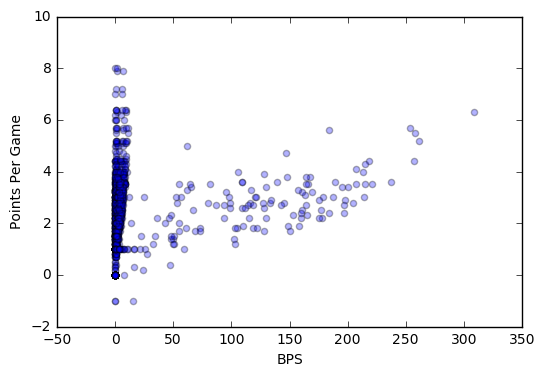

In [4]:
#Some random plotting to determine which attributes to use in the final model
plt.scatter(players_df.value_form, players_df.points_per_game, alpha=0.3)
plt.scatter(players_df.value_season, players_df.points_per_game, alpha=0.3) 
plt.scatter(Defenders_df.bps, Defenders_df.points_per_game, alpha=0.3) 
plt.xlabel("BPS")
plt.ylabel("Points Per Game")

In [5]:
#Exploring the data in the Midfielders data frame
Defenders_df.describe()
Defenders_df.head()
Defenders_df.tail()
Defenders_df.dtypes
Defenders_df.points_per_game.describe()
Defenders_df.points_per_game.value_counts()
Defenders_df.isnull()

,transfers_out,yellow_cards,code,event_total,goals_conceded,photo,red_cards,saves,ep_this,value_form,...,minutes,transfers_in_event,selected_by,element_type,ep_next,team,chance_of_playing_this_round,event_points,second_name,cost_change_event
web_name,,,,,,,,,,,,,,,,,,,,,
Koscielny,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vermaelen,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gibbs,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Jenkinson,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Mertesacker,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Monreal,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Hayden,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bellerín,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Baker,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#Creating  Initial Linear Model for Defenders

defenders_model = smf.ols(formula='event_total ~ selected_by + value_form + value_season + form + ea_index + bps', data=Defenders_df).fit()
defenders_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            event_total   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     42.87
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           2.99e-33
Time:                        19:32:27   Log-Likelihood:                -405.66
No. Observations:                 204   AIC:                             825.3
Df Residuals:                     197   BIC:                             848.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.0220      0.181      0.121      0.904        -0.335     0.379
selected_by     -0.1082      0.036     -2.986      0.003        -0.180    -0.037
value_form       0.0769      2.243      0.034      0.973        -4.347     4.501
value_season     0.4822      0.190      2.533      0.012         0.107     0.858
form             1.0055      0.413      2.434      0.016         0.191     1.820
ea_index         0.0308      0.009      3.421      0.001         0.013     0.048
bps             -0.0324      0.008     -4.274      0.000        -0.047    -0.017
==============================================================================
Omnibus:                       35.037   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.128
Skew:                           0.769   Prob(JB):                     1.47e-18
Kurtosis:                       5.701   Cond. No.                     2.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116578860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11acf9208>]], dtype=object)

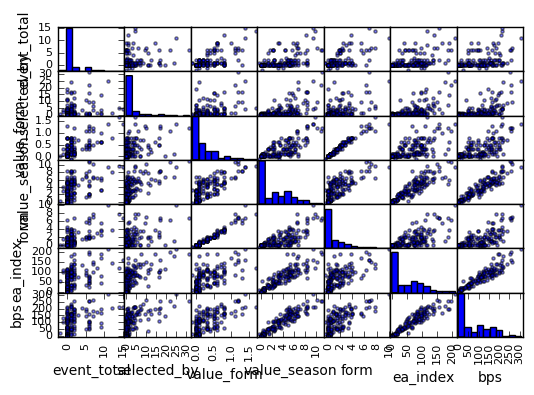

In [7]:
# Exploring Multi-collinearity between Variables
columns = ['event_total', 'selected_by', 'value_form', 'value_season', 'form','ea_index','bps']
pd.scatter_matrix(Defenders_df[columns])

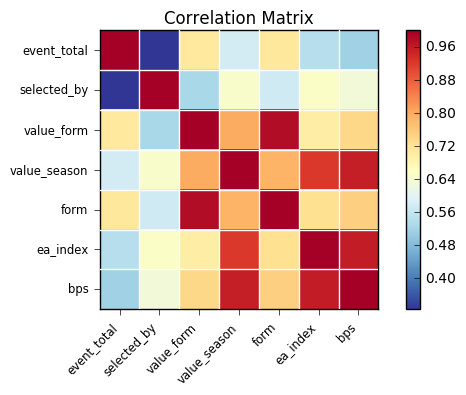

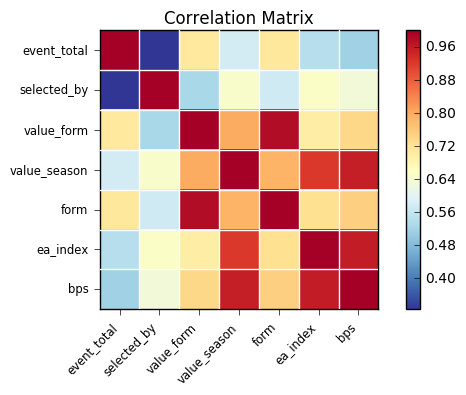

In [8]:
corr_matrix = np.corrcoef(Defenders_df[columns].T)
sm.graphics.plot_corr(corr_matrix, xnames=columns)

In [9]:
# Its obvious from the Correlation Matrix that there is correlation between bps - ea_index & form - value_form
# Hence removing bps & value_from model and exploring
defenders_model = smf.ols(formula='event_total ~ selected_by + form + value_season + ea_index', data=Defenders_df).fit()
defenders_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            event_total   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     55.00
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           3.57e-31
Time:                        19:33:00   Log-Likelihood:                -414.93
No. Observations:                 204   AIC:                             839.9
Df Residuals:                     199   BIC:                             856.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -0.0516      0.185     -0.279      0.781        -0.416     0.313
selected_by     -0.0950      0.036     -2.662      0.008        -0.165    -0.025
form             1.0189      0.116      8.754      0.000         0.789     1.248
value_season     0.0499      0.132      0.377      0.707        -0.211     0.311
ea_index         0.0051      0.007      0.774      0.440        -0.008     0.018
==============================================================================
Omnibus:                       43.453   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.861
Skew:                           0.861   Prob(JB):                     6.32e-29
Kurtosis:                       6.509   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Removing players who have played 0 minutes till now
Defenders_df[Defenders_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_defenders.csv')
regular_defenders_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_defenders.csv',index_col='web_name', na_filter=False)


In [20]:
# Running all features models for data set without fringe players
# This inculdes all the possible features, just to study the importance of each feature
all_features_model = smf.ols(formula='event_total ~ selected_by + total_points+ chance_of_playing_this_round + value_form + value_season + form + transfers_out_event+ transfers_in_event + points_per_game + minutes +ea_index + bps', data=regular_defenders_df).fit()
all_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            event_total   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     10.87
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           5.54e-16
Time:                        19:57:07   Log-Likelihood:                -308.25
No. Observations:                 144   AIC:                             646.5
Df Residuals:                     129   BIC:                             691.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                               0.1767      0.643      0.275      0.784        -1.096     1.449
chance_of_playing_this_round[T.0]       0.0959      0.622      0.154      0.878        -1.136     1.327
chance_of_playing_this_round[T.100]     0.2649      0.422      0.628      0.531        -0.569     1.099
chance_of_playing_this_round[T.75]     -0.0861      1.080     -0.080      0.937        -2.224     2.052
selected_by                            -0.1105      0.067     -1.654      0.100        -0.243     0.022
total_points                            0.0946      0.156      0.606      0.546        -0.214     0.403
value_form                             -0.8743      4.597     -0.190      0.849        -9.970     8.222
value_season                            0.1501      0.663      0.226      0.821        -1.162     1.462
form                                    1.0717      0.918      1.167      0.245        -0.745     2.889
transfers_out_event                 -4.274e-05   6.89e-05     -0.620      0.536        -0.000  9.37e-05
transfers_in_event                   8.271e-05    6.1e-05      1.355      0.178     -3.81e-05     0.000
points_per_game                        -0.1961      0.370     -0.530      0.597        -0.928     0.536
minutes                                 0.0032      0.003      1.207      0.230        -0.002     0.008
ea_index                                0.0189      0.014      1.311      0.192        -0.010     0.048
bps                                    -0.0425      0.013     -3.251      0.001        -0.068    -0.017
==============================================================================
Omnibus:                       17.412   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.782
Skew:                           0.706   Prob(JB):                     1.13e-05
Kurtosis:                       4.344   Cond. No.                     1.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Creating two interaction terms based on what we learned from multi-collinearity matrix
regular_defenders_df['interaction_term1'] = regular_defenders_df.value_form * regular_defenders_df.form
regular_defenders_df['interaction_term2'] = regular_defenders_df.value_season * regular_defenders_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X = regular_defenders_df[cols]

y = regular_defenders_df.event_total

lm = LinearRegression()


In [22]:
scores = cross_val_score(lm, X, y, cv=5, scoring='mean_squared_error')

In [23]:
#Calculating Root Mean Squared Error
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for Nov Model 2.3051

2.3051510798578141

In [24]:
defenders_dec1_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dec1_players.csv',index_col='web_name', na_filter=False)

defenders_dec1_df[defenders_dec1_df.type_name=='Defender'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/DefencePlayers_dec1.csv')

defenders_dec1_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/DefencePlayers_dec1.csv',index_col='web_name', na_filter=False)

defenders_dec1_df[defenders_dec1_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_defenders_dec1.csv')
regular_defenders_dec1_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_defenders_dec1.csv',index_col='web_name', na_filter=False)


regular_defenders_dec1_df['interaction_term1'] = regular_defenders_dec1_df.value_form * regular_defenders_dec1_df.form
regular_defenders_dec1_df['interaction_term2'] = regular_defenders_dec1_df.value_season * regular_defenders_dec1_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X2 = regular_defenders_dec1_df[cols]

y2 = regular_defenders_dec1_df.event_total

lm = LinearRegression()
scores = cross_val_score(lm, X2, y2, cv=5, scoring='mean_squared_error')
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for Dec1 Model 2.322


2.3226938586690031

In [25]:
defenders_dec4_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dec4_players.csv',index_col='web_name', na_filter=False)

defenders_dec4_df[defenders_dec4_df.type_name=='Defender'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/DefencePlayers_dec4.csv')

defenders_dec4_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/DefencePlayers_dec4.csv',index_col='web_name', na_filter=False)

defenders_dec4_df[defenders_dec4_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_defenders_dec4.csv')
regular_defenders_dec4_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_defenders_dec4.csv',index_col='web_name', na_filter=False)


regular_defenders_dec4_df['interaction_term1'] = regular_defenders_dec4_df.value_form * regular_defenders_dec4_df.form
regular_defenders_dec4_df['interaction_term2'] = regular_defenders_dec4_df.value_season * regular_defenders_dec4_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X3 = regular_defenders_dec4_df[cols]

y3 = regular_defenders_dec4_df.event_total

lm = LinearRegression()
scores = cross_val_score(lm, X3, y3, cv=5, scoring='mean_squared_error')
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for dec4 Model 2.0957


2.0957682776760311

In [26]:
defenders_dec9_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dec9_players.csv',index_col='web_name', na_filter=False)

defenders_dec9_df[defenders_dec9_df.type_name=='Defender'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/DefencePlayers_dec9.csv')

defenders_dec9_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/DefencePlayers_dec9.csv',index_col='web_name', na_filter=False)

defenders_dec9_df[defenders_dec9_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_defenders_dec9.csv')
regular_defenders_dec9_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_defenders_dec9.csv',index_col='web_name', na_filter=False)


regular_defenders_dec9_df['interaction_term1'] = regular_defenders_dec9_df.value_form * regular_defenders_dec9_df.form
regular_defenders_dec9_df['interaction_term2'] = regular_defenders_dec9_df.value_season * regular_defenders_dec9_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X4 = regular_defenders_dec9_df[cols]

y4 = regular_defenders_dec9_df.event_total

lm = LinearRegression()
scores = cross_val_score(lm, X4, y4, cv=5, scoring='mean_squared_error')
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for dec9 Model 2.3543


2.3543456834422996

In [28]:
# Training the model on the November Data Set & Testing for Dec 1, Dec4 & Dec 9 Data 

cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']
X = regular_defenders_df[cols]
y = regular_defenders_df.event_total
lm = LinearRegression()
#rf = RandomForestClassifier(n_estimators=100)
#rf.fit(X,y)
lm.fit(X, y) # fitting the linear regression on Nov values of X & Y

# Testing and Predicting for Dec 1 Data set
preds = lm.predict(X2) #X for Dec 1
# calc RMSE to compare preds vs y for Dec 1
rms = np.sqrt(mean_squared_error(y2, preds))
rms # RMSE for preds for Dec1 data set 2.4425


# Testing and Predicting for Dec 4 Data set
preds = lm.predict(X3) #X for Dec 4
# calc RMSE to compare preds vs y for Dec 4
rms = np.sqrt(mean_squared_error(y3, preds))
rms # RMSE for preds for Dec4 data set 2.21459

# Testing and Predicting for Dec 9 Data set
preds = lm.predict(X4) #X for Dec 9
# calc RMSE to compare preds vs y for Dec 9
rms = np.sqrt(mean_squared_error(y4, preds))
rms # RMSE for preds for Dec9 data set 2.40596

2.4425082590192724